## Introduction

In [ ]:
#........

##### External libraries:

In [7]:
import csv
import time
import calendar
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date
from datetime import datetime
from pandas.core.frame import DataFrame
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

## Data read and cleaning

##### Data read:

In [8]:
# Links of rawdata
url1 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-01.csv?token=GHSAT0AAAAAAAAAHGMUFHRNQTID6IAZACGEY3CHMUQ"
# url2 = "https://github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/blob/main/src/resources/Participant-02-detail.csv"  
# url3 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-03.csv?token=GHSAT0AAAAAAAAAHGMU75XPZFWAQ3EUPRYMY3CHNRQ"
# url4 = "https://github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/blob/main/src/resources/Participant-04.csv"
# url5 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-05-detail.csv?token=GHSAT0AAAAAAAAAHGMUXE7OFOFHAG5DQMIWY3CHOFQ"
# url7 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-07.csv?token=GHSAT0AAAAAAAAAHGMVZGNPORTPLEWWQGJEY3CHORA"
# url8 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-08.csv?token=GHSAT0AAAAAAAAAHGMV2U5G6NYBIUDUQ63YY3CHO2Q"

# read data in:
p1 = pd.read_csv(url1)
# p2d = pd.read_csv(url1)
# p3 = pd.read_csv(url3)
# p4 = pd.read_csv(url4)
# p5d = pd.read_csv(url5)
# p7 = pd.read_csv(url7)
# p8 = pd.read_csv(url8)

##### Data cleaning

In [45]:
## undetailed data:
def clean_undetailed_data(df):
    #change foramt to datetime
    df['Start'] = pd.to_datetime(df['Start'])
    #change the datetime format as yyyy-mm-dd
    df['Start'] = df['Start'].dt.strftime('%Y/%m/%d')
    #group by start time and count the steps
    day_data1 = df.groupby(['Start']).sum()
    # add index
    day_data1 = day_data1.reset_index(drop=False)
    #first change the data type to datetime
    day_data1['Start'] = pd.to_datetime(day_data1['Start'])
    #use resample to integrate the data into weekly
    week_data1 = day_data1.resample('W', on="Start").sum()
    #added numbers to record each week
    week_data1['weeks'] = range(len(week_data1))
    return week_data1



# ## Detailed data:
# def clean_detailed_data(df):
#     data = pd.DataFrame({"Date": df['Date'], "Count":df['Count']})
#     # convert type of 'Date' to Datetimes type
#     data['Date'] = pd.to_datetime(data['Date'])
#     # keep data in 2022
#     result = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2022-12-31')]
#     return result

# data1 = clean_undetailed_data(p1)
# data2 = clean_detailed_data(p2d)


In [50]:
data1 = clean_undetailed_data(p1)
data1

,Steps (count),weeks
Start,,
2022-01-02,21946.000000,0
2022-01-09,74631.000000,1
2022-01-16,77187.168847,2
2022-01-23,76837.826805,3
2022-01-30,67928.000000,4
2022-02-06,58390.000000,5
2022-02-13,65910.925031,6
2022-02-20,60400.000000,7
2022-02-27,53202.651648,8


This is a confirmatory analysis. 



purpose: we want to compare the trend of steps in summar and winter

what does the code do: plots line plot which shows the trend of participants' weekly exercise steps.

key aspects of code design: the steps of a aprticipant in a unit time should integer type, 
    because float does not make sense for step count

Test-driven: Try running the code with a different data set to produce the correct plot

`Participant-01.csv`: successful \
`Participant-03.csv`: successful \
`Participant-04.csv`: successful \
`Participant-07.csv`: successful \
`Participant-08.csv`: successful

The code below will show a line graph of the weekly step total, where the x-axis represents the date of the first day of the week; the y-axis represents the weekly step total. Since my question is about comparing weekly steps in winter and summer, I will mainly look at the line graphs for January to March and June to August. In addition to this, it is important to look at the trend (up/down) of the line, rather than the highest and lowest points of the line.

In [ ]:
# Full names: Xin Guo


# details of contribution:
#     1. data clean: chage time format
#     2. aggregate data into day and week
#     3. time series decomposition, get trend of participant's step

# start date: 2022-09-24
# end date: 2022-09-28

# pair-programming: Shangfei Wang



def xinguo_plot(data1):

    data1 = pd.concat([data1, data1]).sort_values("weeks")
    
    data1["Steps (count)"] = data1["Steps (count)"].astype(int)
    
    # generate seasonality decomposition additive analysis
    decomposition_add = seasonal_decompose(data1["Steps (count)"], model='additive', period=4)
    
    # the analysis includes two part: trend and seasonality
    trend = decomposition_add.trend
    season = decomposition_add.seasonal
    
    # plot: set the legnth and width of plot
    fig, axes = plt.subplots(1, 1, sharex=True, sharey=False)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    
    # plot: line plot; set legend, legend location,, x label, ylabel, title
    axes.plot(trend, label='Trend', color = "blue")
    axes.legend(loc='upper left')
    axes.title.set_text('Trend of Weekly Steps')
    axes.set_xlabel('Week Number')
    axes.set_ylabel('Step Count')
    
    return



concludsion: This graph will show a line graph of the trend in weekly step counts, 
we could get the trend of weekly steps in winter and summar, then based on the line plot, we could compare and summary the trend

what to focus on: the line trend in from 2022-01 to 2022-03, and 2022-06 to 2022-07, check the line is increasing or decearsing.

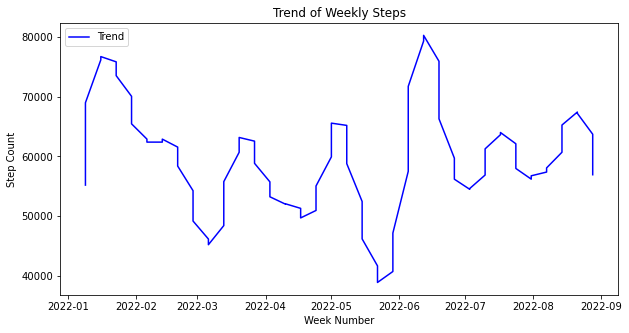

In [52]:
xinguo_plot(data1)

Selection bias: Participants are likely to be mostly students, and their step count patterns are very different from those of people who are already working. \

how affect results: If students are selected as the target population for the analysis of step patterns, their trends are significantly different from those of others. This is because the activities of students are directly related to the school schedule

how your results can be used in line with the driving goals： check the January/February part compared to July/August part, you can see whether the trend is up or down, the plot is just for determing the increasing or deceasing


Limitations: 
- The sample size is not large enough, only nine months of data are available, which is approximately 36 weeks in length.
- The identity of the participants is unknown and the results may not be generalisable